In [117]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os.path

import numpy as np
from matplotlib import pyplot as plt

My trial

In [118]:
import importlib
#import models

In [119]:
import utils
import models
#importlib.reload(utils)

In [130]:
importlib.reload(utils)

<module 'utils' from '/Users/zhanyuan/Documents/Python/CSE253/DeepMusic-Yu/utils.py'>

In [132]:
importlib.reload(models)

<module 'models' from '/Users/zhanyuan/Documents/Python/CSE253/DeepMusic-Yu/models.py'>

In [140]:
data = utils.get_data()
char2idx_dict, idx2char_dict = utils.get_dicts(data)

In [141]:
lstm = models.Music(voc_size=len(char2idx_dict), hidden_size=100, num_layers=2, drop_out = 0.1)

In [142]:
coach = utils.Trainer(lstm, char2idx_dict, idx2char_dict)

In [143]:
loss = coach.fit(data, max_iter=100000, log_freq=500)

epoch 500, loss 2.379
epoch 1000, loss 1.886
epoch 1500, loss 2.650
epoch 2000, loss 2.100
epoch 2500, loss 2.127
epoch 3000, loss 2.126
epoch 3500, loss 1.354
epoch 4000, loss 1.850
epoch 4500, loss 2.211
epoch 5000, loss 2.385
epoch 5500, loss 2.766
epoch 6000, loss 3.069
epoch 6500, loss 1.563
epoch 7000, loss 1.368
epoch 7500, loss 1.928
epoch 8000, loss 1.633
epoch 8500, loss 1.730
epoch 9000, loss 1.804
epoch 9500, loss 1.143
epoch 10000, loss 1.690
epoch 10500, loss 1.564
epoch 11000, loss 0.675
epoch 11500, loss 1.592
epoch 12000, loss 3.621
epoch 12500, loss 1.598
epoch 13000, loss 1.645
epoch 13500, loss 1.988
epoch 14000, loss 0.776
epoch 14500, loss 2.049
epoch 15000, loss 1.674
epoch 15500, loss 2.970
epoch 16000, loss 2.167
epoch 16500, loss 1.916
epoch 17000, loss 0.749
epoch 17500, loss 2.049
epoch 18000, loss 1.107
epoch 18500, loss 1.358
epoch 19000, loss 1.430
epoch 19500, loss 1.655
epoch 20000, loss 1.799
epoch 20500, loss 1.742
epoch 21000, loss 1.279
epoch 21500,

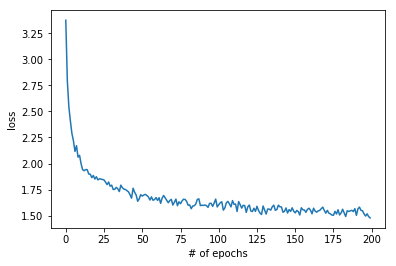

In [144]:
plt.plot([i for i in range(len(loss))], loss)
plt.xlabel('# of epochs')
plt.ylabel('loss')
#plt.legend()
plt.show()

In [145]:
tune = "<start>\n" + coach.inference(temp=.6)
print(tune)

<start>

X:1
T:Padry from Polka
Z:id:hn-hornpipe-4
M:C|
K:Dmix
F2GA Bcde|fddc d2cA|defe dBAG|FAGE G2:|
|:ABcB AFDF|G2GA BAGA|BAGB A2fe|dfed cAGF|EFAB AGFA|(3ABA (3FAG ABcd:|
|:ed (3Bcd efec|defd edef|g2ef g2 (3fed|edef gedc|BAGE GEDE|D2FG ABcd|edcA BAFA|
BGBd AGFE|~A3B dBAG|F2EF GEFE|Gdfd edBd|efdc Bd~f2|edBd e2de|~g3a bage|
fdef a2fa|~bagf efde|fedc d2:|
|: aged edcB|AGFA BAGB:|
|:gfge agec|afde fdcA|B2BG G2:|
|:B2 (3BAG FGAB|cAGE AFAB|cAFA ADFA|AFAF E2:|
|:BABd ~g3a|bgab afef|gfed BAFE|DEFA fdde|~f3d e2de|fedc BGG|AGG ABc|dAFE D2:|
|:ee ed|ed ef|gf ed|g/f/e/f/ ge|fg/f/ ed|B2 g2|e/f/e/d/ ed|BA G2:|
<end>
